In [132]:
#Importing Libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt 
import scipy.stats as st
from scipy.stats import linregress


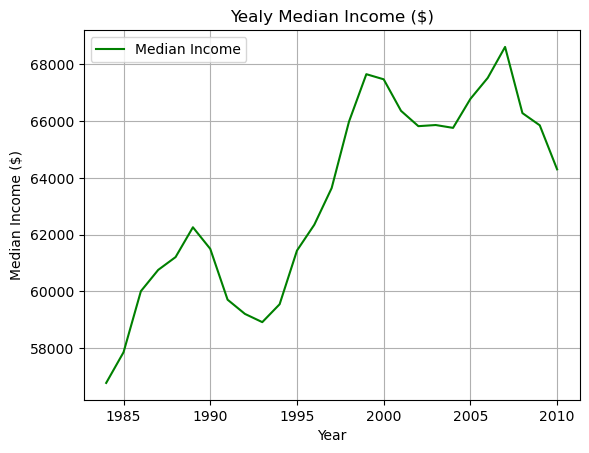

In [2]:
#Accessing data file 
file_path = 'Resources/MEHOINUSA672N.csv'
df = pd.read_csv(file_path)
df.head()

#Converting dates column format
date = df.iloc[:,0]
dt = pd.to_datetime(date)
df['Year'] = pd.DatetimeIndex(df['DATE']).year
del df['DATE']

#Renaming/Reorganizing Columns
df = df[['Year', 'MEHOINUSA672N']]
income_data = df.rename(columns={'MEHOINUSA672N': 'Median Income'})


#Plotting Data 
plot1 = income_data.plot(x='Year', y = 'Median Income', kind = 'line', color ='green')
plt.grid(True)
plt.title('Yealy Median Income ($)')
plt.ylabel('Median Income ($)')
plt.savefig('yearlymedinc.png')
plt.show()


In [3]:
#Summary Statistics

income_stats = income_data['Median Income'].describe()
income_stats.round(2) 

count       27.00
mean     63312.59
std       3462.53
min      56780.00
25%      60385.00
50%      63640.00
75%      66130.00
max      68610.00
Name: Median Income, dtype: float64

<h3>Correlation Analysis</h3>

In [115]:
#Import houses sold data
file2_path = 'Resources/number_houses_sold.csv'
df2 = pd.read_csv(file2_path)
df2 = df2.dropna()
df2 = df2.replace(',','', regex = True)
df2 = df2.astype(int)
df2.head()

,Year,Total (USA),Northeast,MidWest,South,West
0,1963,560,87,134,199,141
1,1964,565,90,146,200,129
2,1965,575,94,142,210,129
3,1966,461,84,113,166,99
4,1967,487,77,112,179,119


In [116]:
#Information of both Dataframes 
df2.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Year         61 non-null     int64
 1   Total (USA)  61 non-null     int64
 2   Northeast    61 non-null     int64
 3   MidWest      61 non-null     int64
 4   South        61 non-null     int64
 5   West         61 non-null     int64
dtypes: int64(6)
memory usage: 3.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Year           27 non-null     int32
 1   MEHOINUSA672N  27 non-null     int64
dtypes: int32(1), int64(1)
memory usage: 452.0 bytes


In [117]:
#Summary Stats 
total_houses = df2['Total (USA)'].astype(int)
house_stats = total_houses.describe()
house_stats

count      61.000000
mean      655.213115
std       202.064191
min       306.000000
25%       509.000000
50%       641.000000
75%       757.000000
max      1283.000000
Name: Total (USA), dtype: float64

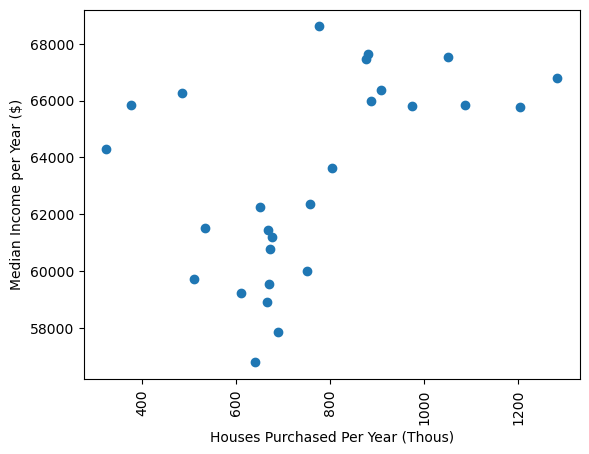

In [128]:
#Merging datasets by year (1984 - 2010) length of median income data 
merge_df = pd.merge(income_data, df2, on='Year')


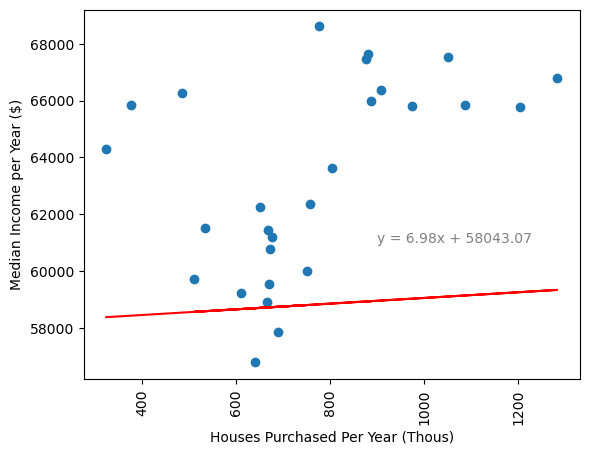

The correlation between both factors is 0.47


In [140]:
#Setting X and Y axis
income = merge_df['Median Income']
purchased = merge_df['Total (USA)']

#Linear Regression of Income and Homes purchased 
(slope, intercept, rvalue, pvalue, stderr) = linregress(purchased, income)
regress = purchased * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Scatter plot and linear regression plot
plt.scatter(purchased, income) 
plt.plot(purchased, regress, 'r-')
plt.annotate(line_eq,(900, 61000), color = 'gray')
plt.xticks(rotation = 'vertical')
plt.xlabel('Houses Purchased Per Year (Thous)')
plt.ylabel('Median Income per Year ($)')
plt.savefig('incomeregress.png')
plt.show()

#Peasrson correlation
correlation = st.pearsonr(income, purchased)
print(f'The correlation between both factors is {round(correlation[0],2)}')